In [1]:
import matplotlib.pyplot as plot
import numpy as np

In [23]:
data = np.genfromtxt('q-outcomes.csv', delimiter=',', names=['winner', 'invalids'])

In [24]:
valid_data = data[np.isnan(data['winner']) == False]

Text(0.5,1,'Avg. Invalid Moves Every 100 Games (Policy Gradient)')

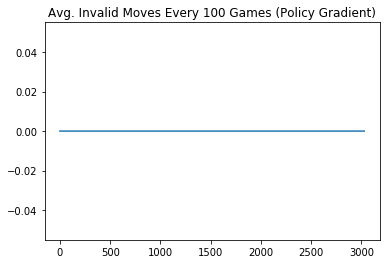

In [25]:
plot.plot(np.mean(data["invalids"].reshape(-1, 100), axis=1))
plot.title('Avg. Invalid Moves Every 100 Games (Policy Gradient)')

In [26]:
valid_data = data[np.isnan(data['winner']) == False]

In [27]:
scrubbed_data = valid_data['winner'][0 : (len(valid_data['winner']) - (len(valid_data['winner']) % 100))]
scrubbed_data = scrubbed_data.reshape(-1, 100)

In [28]:
wins = []
losses = []
ties = []
for epoch_data in scrubbed_data:
    items, counts = np.unique(epoch_data, return_counts=True)
    items = items.tolist()
    if 0. in items:
        losses.append(counts[items.index(0.)])
    else:
        losses.append(0)
    if 0.5 in items:
        ties.append(counts[items.index(0.5)])
    else:
        ties.append(0)
    if 1. in items:
        wins.append(counts[items.index(1.)])
    else:
        wins.append(0)

Text(0.5,1,'Wins, Losses, Ties for Each Epoch')

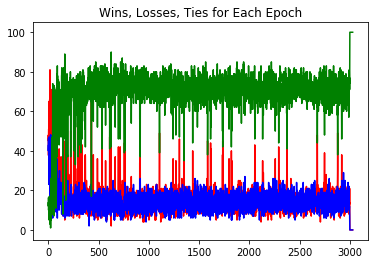

In [29]:
plot.plot(wins, 'r-', losses, 'b-', ties, 'g-')
plot.title("Wins, Losses, Ties for Each Epoch")